In [1]:
import numpy as np
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:

# Analytical solutions found in Zehnder
a = 15
x1 = np.linspace(0,2*a,401)
x2 = np.linspace(0,1.5*a,201)
X1,X2 = np.meshgrid(x1,x2)
Z = X1 + 1j*X2
# face pressure in MPa 
# rho*g*h ~ 30 MPa minus the injection pressure 4000 Psi ~ 1MPa
sigmaInf = 1e6 

# s11 = sigmaInf*np.real(Z / np.sqrt(Z**2 - a**2))\
#     - X2*np.imag(1/np.sqrt(Z**2 - a**2)\
#                  - Z**2/(Z**2-a**2)**(3/2))
                 
s11 = np.real(Z / np.sqrt(Z**2 - a**2))\
    - X2*np.imag(1/np.sqrt(Z**2 - a**2)\
                 - Z**2/(Z**2-a**2)**(3/2)) - 1
s22 = np.real(Z / np.sqrt(Z**2 - a**2))\
    + X2*np.imag(1/np.sqrt(Z**2 - a**2)\
                 - Z**2/(Z**2-a**2)**(3/2))

E = 1e10
nu=0.3


/tmp/ipykernel_551884/2263591811.py:15: RuntimeWarning: divide by zero encountered in true_divide
  s11 = np.real(Z / np.sqrt(Z**2 - a**2))\
/tmp/ipykernel_551884/2263591811.py:15: RuntimeWarning: invalid value encountered in true_divide
  s11 = np.real(Z / np.sqrt(Z**2 - a**2))\
/tmp/ipykernel_551884/2263591811.py:16: RuntimeWarning: divide by zero encountered in true_divide
  - X2*np.imag(1/np.sqrt(Z**2 - a**2)\
/tmp/ipykernel_551884/2263591811.py:16: RuntimeWarning: invalid value encountered in true_divide
  - X2*np.imag(1/np.sqrt(Z**2 - a**2)\
/tmp/ipykernel_551884/2263591811.py:17: RuntimeWarning: divide by zero encountered in true_divide
  - Z**2/(Z**2-a**2)**(3/2)) - 1
/tmp/ipykernel_551884/2263591811.py:17: RuntimeWarning: invalid value encountered in true_divide
  - Z**2/(Z**2-a**2)**(3/2)) - 1
/tmp/ipykernel_551884/2263591811.py:16: RuntimeWarning: invalid value encountered in subtract
  - X2*np.imag(1/np.sqrt(Z**2 - a**2)\
/tmp/ipykernel_551884/2263591811.py:18: RuntimeWarni

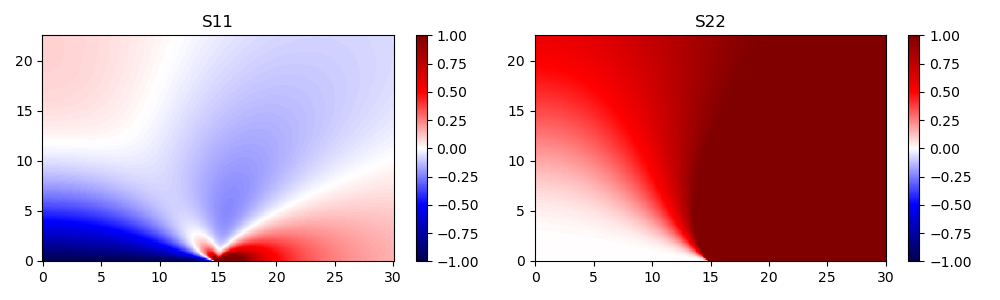

In [3]:

plt.subplots(1,2,figsize=(10,3))
ax=plt.subplot(1,2,1)
p1=plt.pcolor(x1,x2,s11,vmin=-1,vmax=1,cmap='seismic')
ax.set_aspect('auto')
plt.title('S11')
plt.colorbar(p1)

plt.subplot(1,2,2)
p2=plt.pcolor(x1,x2,s22,vmin=-1,vmax=1,cmap='seismic')
plt.title('S22')
plt.colorbar(p2)

plt.tight_layout()
plt.show()


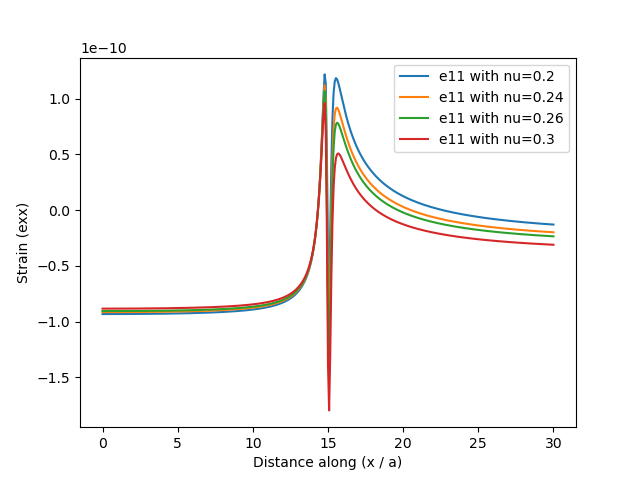

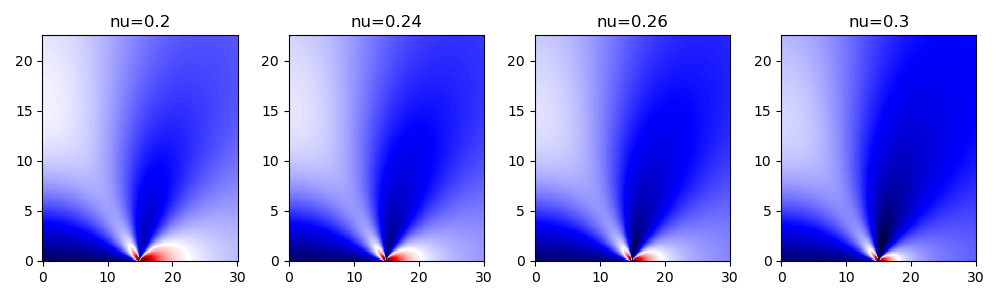

In [5]:

distance_from_the_fracture_plane = 2


fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots(1,4,figsize=(10,3))
for i,nu in enumerate((0.2,0.24,0.26,0.3,)):
    e11 = (1+nu)/E *(s11 - (nu)*(s11+s22))

    axx = plt.subplot(1,4,i+1)
    p2=axx.pcolor(x1,x2,e11,vmin=-1e-10,vmax=1e-10,cmap='seismic')
    axx.set_title(f'nu={nu}')
#     axx.colorbar(p2)
    
    ax2.plot(x1,e11[distance_from_the_fracture_plane,:],label=f'e11 with nu={nu}')
    ax2.legend()
    ax2.set_ylabel('Strain (exx)')
    ax2.set_xlabel('Distance along (x / a)')
fig3.tight_layout()